<a href="https://colab.research.google.com/github/JSEFERINO/CURSO5/blob/main/Copy_of_Lab14_Modelos_Discretos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 14. Modelos Probabilisticos Discretos**
## Marianna Aguilera
### **Debes compartir el Informe final al email: juliohurtado210307@gmail.com**
### **Video de Youtube:  https://youtu.be/E1moErOrF1Y**

# **Tema principal: Modelos Probabiliticos Discretos**
+ _Los modelos probabilísticos discretos se utilizan para describir experimentos aleatorios donde los resultados posibles son un conjunto finito o infinito numerable de valores. Aquí tienes una breve descripción de algunos modelos discretos y ejemplos asociados a cada uno:_



### 1. **Distribución Binomial**
La distribución binomial modela el número de éxitos en una secuencia de $n$ ensayos independientes de Bernoulli, donde cada ensayo tiene dos posibles resultados: éxito o fracaso, y la probabilidad de éxito es $p$.

- **Función de probabilidad**: $$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}$$
$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$
- **Parámetros**:$n$ es el número de ensayos y $p$ es la probabilidad de éxito en cada ensayo.


### **Distribución Binomial - Momentos**
- **Valor esperado (Esperanza)**: $$E(X) = n \cdot p$$
- **Varianza**: $$\text{Var}(X) = n \cdot p \cdot (1 - p)$$
- **Desviación estándar**: $$\sigma(X) = \sqrt{n \cdot p \cdot (1 - p)}$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, nbinom, poisson, hypergeom, randint

# @title **Para Graficar cualquier distribucion discreta**
def plot_distribution(dist, values, pmf, title):
    plt.bar(values, pmf)
    plt.title(title)
    plt.xlabel('Valores')
    plt.ylabel('Probabilidad')
    plt.show()


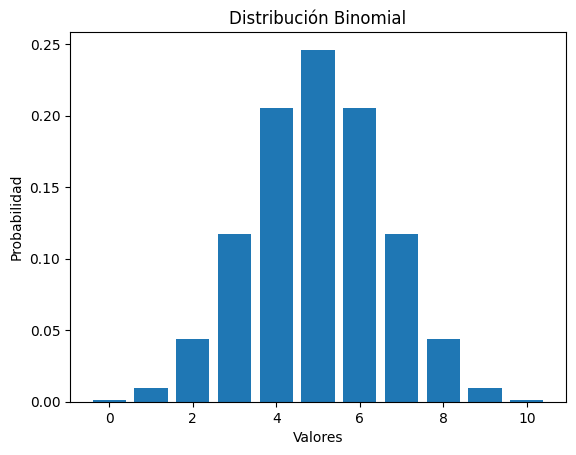

In [ ]:
# @title **1. Gráfica de la Distribución Binomial con Función de probabilidad**: $$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}$$
n, p = 10, 0.5
x_binom = np.arange(0, n + 1)
pmf_binom = binom.pmf(x_binom, n, p)
plot_distribution(binom, x_binom, pmf_binom, "Distribución Binomial")



#### **Ejemplo 1: - Distribución Binomial**
+ *Supongamos que lanzamos una moneda justa (probabilidad de éxito $p = 0.5$, $n =10$ veces. ¿Cuál es la probabilidad de obtener exactamente 6 caras?*

In [ ]:
# @title **Solución ejemplo 1. Binomial -Función de probabilidad**: $$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}$$
from scipy.stats import binom

# Parámetros
n = 10  # Número de ensayos
p = 0.5  # Probabilidad de éxito
k = 6  # Número de éxitos

# Probabilidad de obtener exactamente 6 caras
prob_binom_1 = binom.pmf(k, n, p)
print(f"Probabilidad de obtener exactamente 6 caras: P(X = 6) = {prob_binom_1:.4f}")


Probabilidad de obtener exactamente 6 caras: P(X = 6) = 0.2051


In [ ]:
# @title **Momentos Modelo Binomial**
n = 10
p = 0.5
esperanza_binom = n * p
varianza_binom = n * p * (1 - p)
desviacion_binom = np.sqrt(varianza_binom)
print(f"Momentos en el Modelo Binomial")
print(f"Esperanza:E(X) = {n}{p}= {esperanza_binom}")
print(f"Varianza: V(X) = {n} * {p} * {(1 - p)} = {varianza_binom}")
print(f"Desviación estándar: {desviacion_binom}")


Momentos en el Modelo Binomial
Esperanza:E(X) = 100.5= 5.0
Varianza: V(X) = 10 * 0.5 * 0.5 = 2.5
Desviación estándar: 1.5811388300841898



#### **Ejemplo 2: Distribución Binomial - Debes realizarlo en este Laboratorio**
+ *En un control de calidad, se seleccionan $n=5$ piezas de un lote. La probabilidad de que una pieza esté defectuosa es $p=0.1$. ¿Cuál es la probabilidad de encontrar exactamente 3 piezas defectuosa?*


In [ ]:
# @title **Solución ejemplo 2. Binomial -Función de probabilidad**
from scipy.stats import binom

# Parámetros
n = 5  # Número de ensayos
p = 0.1  # Probabilidad de éxito
k = 3  # Número de éxitos

# Probabilidad de obtener exactamente 6 caras
prob_binom_1 = binom.pmf(k, n, p)
print(f"Probabilidad de encontrar exactamente 3 piezas: P(X = 3) = {prob_binom_1:.4f}")

Probabilidad de encontrar exactamente 3 piezas: P(X = 3) = 0.0081


In [ ]:
# @title **Momentos Modelo Binomial**
n = 5
p = 0.1
esperanza_binom = n * p
varianza_binom = n * p * (1 - p)
desviacion_binom = np.sqrt(varianza_binom)
print(f"Momentos en el Modelo Binomial")
print(f"Esperanza:E(X) = {n}{p}= {esperanza_binom}")
print(f"Varianza: V(X) = {n} * {p} * {(1 - p)} = {varianza_binom}")
print(f"Desviación estándar: {desviacion_binom}")

Momentos en el Modelo Binomial
Esperanza:E(X) = 50.1= 0.5
Varianza: V(X) = 5 * 0.1 * 0.9 = 0.45
Desviación estándar: 0.6708203932499369



### 2. **Distribución Binomial Negativa**
+ *La distribución binomial negativa modela el número de ensayos requeridos para obtener un número fijo de éxitos $r$ en ensayos independientes de Bernoulli, donde la probabilidad de éxito es $p$.*

- **Función de probabilidad**: $$P(X = k) = \binom{k + r - 1}{r - 1} p^r (1 - p)^k$$
- **Parámetros**:$r$ es el número de éxitos deseados, $p$ es la probabilidad de éxito y $k$ es el número de fracasos antes de obtener $r$ éxitos.

### **Distribución Binomial Negativa - Momentos**
- **Valor esperado (Esperanza)**: $$E(X) = \frac{r(1 - p)}{p}$$
- **Varianza**: $$\text{Var}(X) = \frac{r(1 - p)}{p^2}$$
- **Desviación estándar**: $$\sigma(X) = \sqrt{\frac{r(1 - p)}{p^2}}$$



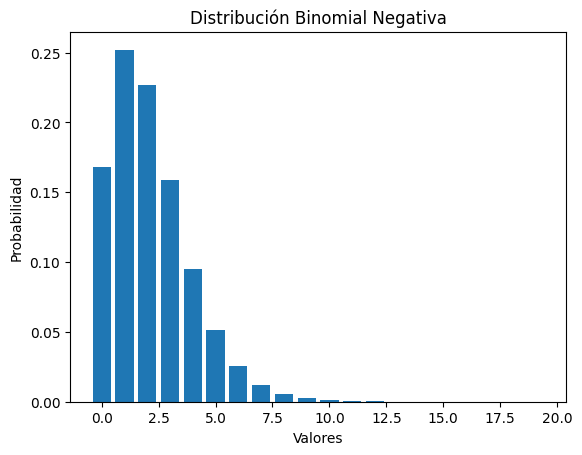

In [ ]:
# @title **Gráfica de la Distribución Binomial Negativa** $$P(X = k) = \binom{k + r - 1}{r - 1} p^r (1 - p)^k$$
r, p = 5, 0.7
x_nbinom = np.arange(0, 20)
pmf_nbinom = nbinom.pmf(x_nbinom, r, p)
plot_distribution(nbinom, x_nbinom, pmf_nbinom, "Distribución Binomial Negativa")



#### **Ejemplo 1:- Distribución Binomial Negativa**
+ *¿Cuál es la probabilidad de obtener 5 éxitos antes de 3 fracasos si la probabilidad de éxito es $p = 0.7$?*


In [ ]:
# @title **2. Solución Ejemplo 1 -Distribución Binomial negativa** $$P(X = k) = \binom{k + r - 1}{r - 1} p^r (1 - p)^k$$

from scipy.stats import nbinom

# Parámetros
r = 5  # Número de éxitos
p = 0.7  # Probabilidad de éxito
k = 3  # Número de fracasos antes de obtener 5 éxitos

# Probabilidad
prob_nbinom_1 = nbinom.pmf(k, r, p)
print(f"Probabilidad de obtener 5 éxitos antes de 3 fracasos: P(X=5) = {prob_nbinom_1:.4f}")


Probabilidad de obtener 5 éxitos antes de 3 fracasos: P(X=5) = 0.1588


In [ ]:
# @title **Momentos Modelo Binomial Negativo**
r = 5
p = 0.7
esperanza_nbinom = r * (1 - p) / p
varianza_nbinom = r * (1 - p) / (p ** 2)
desviacion_nbinom = np.sqrt(varianza_nbinom)
print(f"Momentos en el Modelo Binomial Negativo")
print(f"Esperanza:E(X) =  {esperanza_nbinom}")
print(f"Varianza: V(X) =  {varianza_nbinom}")
print(f"Desviación estándar: {desviacion_nbinom}")

Momentos en el Modelo Binomial Negativo
Esperanza:E(X) =  2.1428571428571432
Varianza: V(X) =  3.061224489795919
Desviación estándar: 1.7496355305594131



#### **Ejemplo 2. -Distribución Binomial Negativa: Debes realizarlo en este Laboratorio**
+ *Si lanzamos un dado con probabilidad de éxito $p = 1/6$, ¿cuál es la probabilidad de obtener 2 éxitos antes de obtener 4 fracasos?*


In [ ]:
# @title **2. Solución Ejemplo 2 -Distribución Binomial negativa**

from scipy.stats import nbinom

# Parámetros
r = 2  # Número de éxitos
p = 1/6  # Probabilidad de éxito
k = 4  # Número de fracasos antes de obtener 5 éxitos

# Probabilidad
prob_nbinom_1 = nbinom.pmf(k, r, p)
print(f"Probabilidad de obtener 2 éxitos antes de 4 fracasos: P(X=2) = {prob_nbinom_1:.4f}")

Probabilidad de obtener 2 éxitos antes de 4 fracasos: P(X=2) = 0.0670


In [ ]:
# @title **Momentos Modelo Binomial Negativo**
r = 2
p = 1/6
esperanza_nbinom = r * (1 - p) / p
varianza_nbinom = r * (1 - p) / (p ** 2)
desviacion_nbinom = np.sqrt(varianza_nbinom)
print(f"Momentos en el Modelo Binomial Negativo")
print(f"Esperanza:E(X) =  {esperanza_nbinom}")
print(f"Varianza: V(X) =  {varianza_nbinom}")
print(f"Desviación estándar: {desviacion_nbinom}")

Momentos en el Modelo Binomial Negativo
Esperanza:E(X) =  10.000000000000002
Varianza: V(X) =  60.00000000000001
Desviación estándar: 7.745966692414834



### 3. **Distribución de Poisson**
+ *La distribución de Poisson modela el número de eventos que ocurren en un intervalo de tiempo o espacio, bajo la suposición de que los eventos ocurren con una tasa constante y de forma independiente entre sí.*

- **Función de probabilidad**: $$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$
- **Parámetros**: $\lambda$ es la tasa promedio de ocurrencia de eventos en el intervalo de tiempo o espacio.


### **Distribución de Poisson - Momentos**
- **Valor esperado (Esperanza)**: $$E(X) = \lambda$$
- **Varianza**: $$\text{Var}(X) = \lambda$$
- **Desviación estándar**: $$\sigma(X) = \sqrt{\lambda}$$




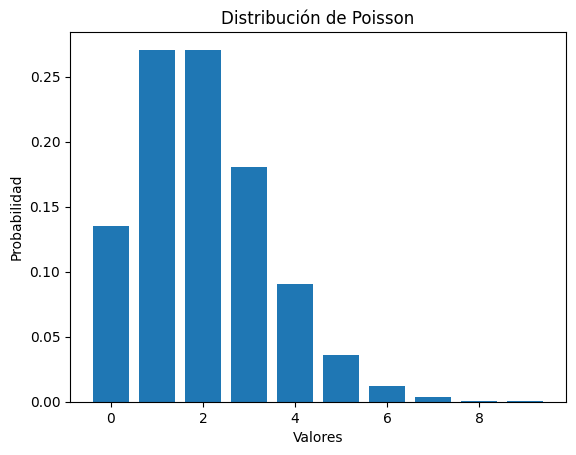

In [ ]:
import matplotlib.pyplot as plt

# @title **Gráfica de la Distribución de Poisson**
def plot_distribution(dist, values, pmf, title):
    plt.bar(values, pmf)
    plt.title(title)
    plt.xlabel('Valores')
    plt.ylabel('Probabilidad')
    plt.show()

# @title **Gráfica de la Distribución de Poisson** $$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$
lambda_poisson = 2
x_poisson = np.arange(0, 10)
pmf_poisson = poisson.pmf(x_poisson, lambda_poisson)
plot_distribution (dist=poisson, values=x_poisson, pmf=pmf_poisson, title="Distribución de Poisson")


#### **Ejemplo 1: Distribución de Poisson**
+ *Una central telefónica recibe en promedio 2 llamadas por minuto. ¿Cuál es la probabilidad de que en un minuto se reciban exactamente 3 llamadas?*


In [ ]:
# @title  **Solución Ejemplo 1: Distribución de Poisson** $$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$
from scipy.stats import poisson

# Parámetros
lambda_poisson = 2  # Tasa promedio de ocurrencia
k = 3  # Número de eventos (llamadas)

# Probabilidad
prob_poisson_1 = poisson.pmf(k, lambda_poisson)
print(f"Probabilidad de recibir exactamente 3 llamadas:P(X=3) = {prob_poisson_1:.4f}")


Probabilidad de recibir exactamente 3 llamadas:P(X=3) = 0.1804


In [ ]:

# @title  **Momentos en el modelo de Poisson**
lambda_poisson = 2
esperanza_poisson = lambda_poisson
varianza_poisson = lambda_poisson
desviacion_poisson = np.sqrt(varianza_poisson)

print(f"Momentos en el Modelo de Poisson")
print(f"Esperanza:E(X) =  {esperanza_poisson}")
print(f"Varianza: V(X) =  {varianza_poisson}")
print(f"Desviación estándar: {desviacion_poisson: .2f}")


Momentos en el Modelo de Poisson
Esperanza:E(X) =  2
Varianza: V(X) =  2
Desviación estándar:  1.41



#### **Ejemplo 2: Distribución de Poisson - Debes realizarlo en este Laboratorio**
+ *En una intersección, se observa que en promedio ocurren 5 accidentes al mes. ¿Cuál es la probabilidad de que en 5 mes ocurra 12 accidente?*

In [ ]:
# @title  **Solución Ejemplo 2: Distribución de Poisson**
from scipy.stats import poisson

# Parámetros
lambda_poisson = 5  # Tasa promedio de ocurrencia
k = 12  # Número de eventos (llamadas)

# Probabilidad
prob_poisson_1 = poisson.pmf(k, lambda_poisson)
print(f"Probabilidad de recibir exactamente 3 llamadas:P(X=3) = {prob_poisson_1:.4f}")

Probabilidad de recibir exactamente 3 llamadas:P(X=3) = 0.0034


In [ ]:
# @title  **Momentos en el modelo de Poisson**
lambda_poisson = 5
esperanza_poisson = lambda_poisson
varianza_poisson = lambda_poisson
desviacion_poisson = np.sqrt(varianza_poisson)

print(f"Momentos en el Modelo de Poisson")
print(f"Esperanza:E(X) =  {esperanza_poisson}")
print(f"Varianza: V(X) =  {varianza_poisson}")
print(f"Desviación estándar: {desviacion_poisson}")


### 4. **Distribución Hipergeométrica**
+ *La distribución hipergeométrica modela el número de éxitos en una muestra de tamaño \(n\) tomada sin reemplazo de una población de tamaño \(N\), que contiene \(K\) éxitos y \(N - K\) fracasos.*

- **Función de probabilidad**: $$P(X = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}$$
- **Parámetros**: \(N\) es el tamaño de la población, \(K\) es el número de éxitos en la población, \(n\) es el tamaño de la muestra, y \(k\) es el número de éxitos en la muestra.

### **Distribución Hipergeométrica - Momentos**
- **Valor esperado (Esperanza)**: $$E(X) = n \cdot \frac{K}{N}$$
- **Varianza**: $$\text{Var}(X) = n \cdot \frac{K}{N} \cdot \frac{N - K}{N} \cdot \frac{N - n}{N - 1}$$
- **Desviación estándar**: $$\sigma(X) = \sqrt{\text{Var}(X)}$$




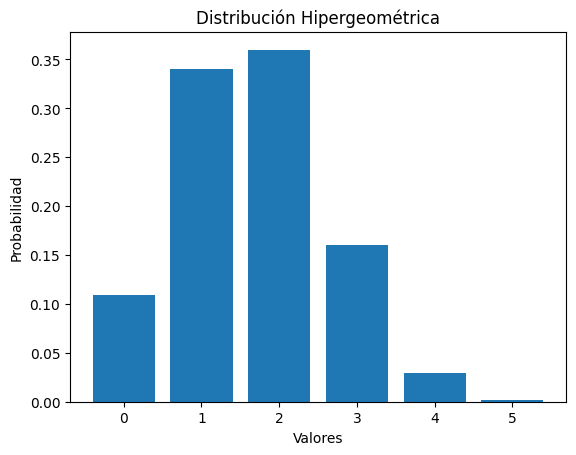

In [ ]:

# @title **Gráfica de la Distribución Hipergeométrica** $$P(X = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}$$
N, K, n = 30, 10, 5
x_hyper = np.arange(0, n + 1)
pmf_hyper = hypergeom.pmf(x_hyper, N, K, n)
plot_distribution(hypergeom, x_hyper, pmf_hyper, "Distribución Hipergeométrica")



#### **Ejemplo 1:- Distribución Hipergeométrica**
+ *Una urna contiene 10 bolas rojas y 20 bolas azules. Se seleccionan 5 bolas sin reemplazo. ¿Cuál es la probabilidad de seleccionar exactamente 3 bolas rojas?*

In [ ]:
# @title **Solución Ejemplo 1:- Distribución Hipergeométrica** $$P(X = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}$$
from scipy.stats import hypergeom

# Parámetros
N = 30  # Tamaño de la población (total de bolas)
K = 10  # Número de éxitos en la población (bolas rojas)
n = 5  # Tamaño de la muestra
k = 3  # Número de éxitos en la muestra (bolas rojas)

# Probabilidad
prob_hyper_1 = hypergeom.pmf(k, N, K, n)
print(f"Probabilidad de seleccionar exactamente 3 bolas rojas: P(X=3)={prob_hyper_1:.2f}")


Probabilidad de seleccionar exactamente 3 bolas rojas: P(X=3)=0.1600


In [ ]:
# @title  **Momentos en el modelo Hipergeométrico**
N = 30  # Tamaño de la población
K = 10  # Éxitos en la población
n = 5   # Tamaño de la muestra

esperanza_hyper = n * (K / N)
varianza_hyper = n * (K / N) * ((N - K) / N) * ((N - n) / (N - 1))
desviacion_hyper = np.sqrt(varianza_hyper)

print(f"Momentos en el Modelo Hipergeométrico")
print(f"Esperanza:E(X) =  {esperanza_hyper}")
print(f"Varianza: V(X) =  {varianza_hyper}")
print(f"Desviación estándar: {desviacion_hyper}")

Momentos en el Modelo Hipergeométrico
Esperanza:E(X) =  1.6666666666666665
Varianza: V(X) =  0.957854406130268
Desviación estándar: 0.978700365857839



#### **Ejemplo 2: - Distribución Hipergeométrica- Debes realizarlo en este Laboratorio**
En una fábrica, de un lote de 50 productos, 8 son defectuosos. Si se seleccionan 10 productos al azar, ¿cuál es la probabilidad de que 2 productos sean defectuosos?


In [ ]:
# @title **Solución Ejemplo 2:- Distribución Hipergeométrica**
from scipy.stats import hypergeom

# Parámetros
N = 50  # Tamaño de la población (total de bolas)
K = 8  # Número de éxitos en la población (bolas rojas)
n = 10  # Tamaño de la muestra
k = 2  # Número de éxitos en la muestra (bolas rojas)

# Probabilidad
prob_hyper_1 = hypergeom.pmf(k, N, K, n)
print(f"Probabilidad de que 2 productos sean defectuosos: P(X=2)={prob_hyper_1:.4f}")

Probabilidad de que 2 productos sean defectuosos: P(X=2)=0.3217


In [ ]:
# @title  **Momentos en el modelo Hipergeométrico**
N = 50  # Tamaño de la población
K = 8  # Éxitos en la población
n = 10   # Tamaño de la muestra

esperanza_hyper = n * (K / N)
varianza_hyper = n * (K / N) * ((N - K) / N) * ((N - n) / (N - 1))
desviacion_hyper = np.sqrt(varianza_hyper)

print(f"Momentos en el Modelo Hipergeométrico")
print(f"Esperanza:E(X) =  {esperanza_hyper}")
print(f"Varianza: V(X) =  {varianza_hyper}")
print(f"Desviación estándar: {desviacion_hyper}")

Momentos en el Modelo Hipergeométrico
Esperanza:E(X) =  1.6
Varianza: V(X) =  1.0971428571428572
Desviación estándar: 1.0474458731327634



### 5. **Distribución Uniforme Discreta**
+ *La distribución uniforme discreta modela una situación donde todos los valores enteros posibles entre dos límites $a$ y $b$ tienen la misma probabilidad.*

- **Función de probabilidad**: $$P(X = x) = \frac{1}{b - a + 1}$$ para $x = a, a+1, \dots, b$
- **Parámetros**: $a$ es el límite inferior, $b$ es el límite superior.

### **Distribución Uniforme Discreta - Momentos**
- **Valor esperado (Esperanza)**: $$E(X) = \frac{a + b}{2}$$
- **Varianza**: $$\text{Var}(X) = \frac{(b - a + 1)^2 - 1}{12}$$
- **Desviación estándar**: $$\sigma(X) = \sqrt{\text{Var}(X)}$$


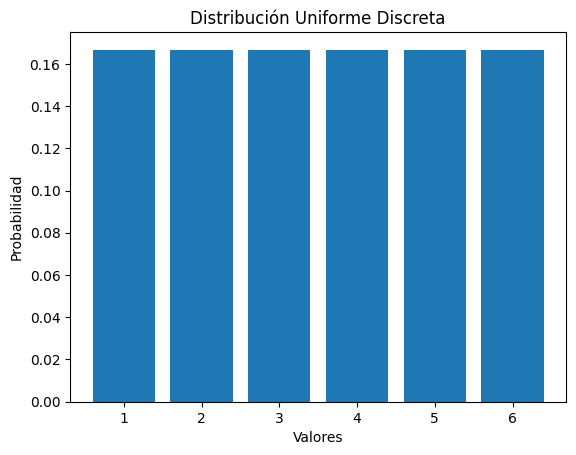

In [ ]:
# @title **Grafica de la Uniforme Discreta** $$P(X = x) = \frac{1}{b - a + 1}$$ para $x = a, a+1, \dots, b$
a, b = 1, 6
x_uniform = np.arange(a, b + 1)
pmf_uniform = [1 / (b - a + 1)] * len(x_uniform)
plot_distribution(randint, x_uniform, pmf_uniform, "Distribución Uniforme Discreta")



#### **Ejemplo 1: - Distribución Uniforme Discreta**
+ *Si un dado se lanza, ¿cuál es la probabilidad de obtener un número mayor que 4?*


In [ ]:
# @title **Solución ejemplo 1.** $$P(X = x) = \frac{1}{b - a + 1}$$ para $x = a, a+1, \dots, b$
from scipy.stats import randint

# Parámetros
a, b = 1, 6  # Límite inferior y superior del dado
k1 = 5  # Número mayor que 4
k2 = 6 # Número mayor que 4

# Probabilidad
prob_uniform_1 = randint.pmf(k1, a, b+1)
prob_uniform_2 = randint.pmf(k2, a, b+1)
print(f"Probabilidad de obtener un número mayor que 4")
print(f'P(X>4) = P(X=5)+P(X=6) = 2*{prob_uniform_1:.4f}= {2*prob_uniform_2:.4f}')


Probabilidad de obtener un número mayor que 4
P(X>4) = P(X=5)+P(X=6) = 2*0.1667= 0.3333


In [ ]:
# @title  **Momentos en el modelo Uniforme discreto**
a, b = 1, 6  # Limites del dado

esperanza_uniform = (a + b) / 2
varianza_uniform = ((b - a + 1) ** 2 - 1) / 12
desviacion_uniform = np.sqrt(varianza_uniform)

print(f"Momentos en el Modelo Uniforme Discreto")
print(f"Esperanza:E(X) =  {esperanza_uniform}")
print(f"Varianza: V(X) =  {varianza_uniform}")

Momentos en el Modelo Uniforme Discreto
Esperanza:E(X) =  3.5
Varianza: V(X) =  2.9166666666666665



#### **Ejemplo 2:- Distribución Uniforme Discreta - Debes realizarlo en este Laboratorio**
+ *Se selecciona un número al azar entre 1 y 20. ¿Cuál es la probabilidad de obtener un número par?*


In [ ]:
# @title **Solución ejemplo 2.**
from scipy.stats import randint

# Parámetros
a, b = 1, 20  # Límite inferior y superior
# Total de resultados posibles
total_resultados = b - a + 1
# Números pares en el rango [a, b]
numeros_pares = [x for x in range(a, b + 1) if x % 2 == 0]
# Cantidad de números pares
cantidad_numeros_pares = len(numeros_pares)
a, b = 1, 20  # Límite inferior y superior
# Probabilidad de obtener un número par
prob_par = cantidad_numeros_pares / total_resultados

print(f"Probabilidad de obtener un número par entre {a} y {b}: P(X es par) = {prob_par:.4f}")

Probabilidad de obtener un número par entre 1 y 20: P(X es par) = 0.5000


In [ ]:
# @title  **Momentos en el modelo Uniforme discreto**
a, b = 1, 20  # Limite inferior y superior

esperanza_uniform = (a + b) / 2
varianza_uniform = ((b - a + 1) ** 2 - 1) / 12
desviacion_uniform = np.sqrt(varianza_uniform)

print(f"Momentos en el Modelo Uniforme Discreto")
print(f"Esperanza:E(X) =  {esperanza_uniform}")
print(f"Varianza: V(X) =  {varianza_uniform}")

Momentos en el Modelo Uniforme Discreto
Esperanza:E(X) =  10.5
Varianza: V(X) =  33.25
